# ODE: more examples
From 
https://www.kau.edu.sa/Files/0060757/Subjects/Numerical%20Solution%20of%20Differential%20Equations.pdf

## 1. Chemical reactions

Suppose the following chemical reactions taking place

A->B with reaction rate 1/min

B->A with reaction rate 0/min

B->C with reaction rate 2/min

C->B with reaction rate 3/min

Initiall we only have A with abundance $C_{A}=$1.
Solve the system of ODEs for time up to 0.13 min with time internval of 0.01 min.

Solution:
\begin{eqnarray}
d C_A/dt &=& -C_A\\
d C_B/dt &=& C_A-2C_B+3C_C\\
d C_C/dt &=& 2C_B-3C_C\,.
\end{eqnarray}

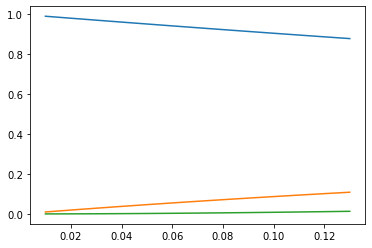

In [4]:
import numpy as np
import matplotlib.pyplot as plt


tend=0.13
h=0.01
y=[1.,0.,0.]
t=0

def f(t, y):
    f=np.zeros(3)
    f[0]=-y[0]
    f[1]=y[0]-2*y[1]+3*y[2]
    f[2]=2*y[1]-3*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=1./6.*(k1+2*k2+2*k3+k4)
    return y

tp=[]
y0p=[]
y1p=[]
y2p=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,3) # please fill in rk4 parameters
    y0p=np.append(y0p,y[0])
    y1p=np.append(y1p,y[1])
    y2p=np.append(y2p,y[2])
    t = t+h
    tp=np.append(tp,t)

plt.plot(tp,y0p)
plt.plot(tp,y1p)
plt.plot(tp,y2p)
plt.show()

## 2. higher order ODE

Please solve the following ODE
\begin{equation}
\frac{d^2y}{dt^2}+\frac{dy}{dt}+y=1
\end{equation}
with y(0)=0,y'(0)=1. Using h=0.1 for t up to 2

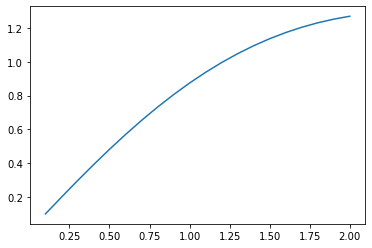

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#please finish initial condition
tend=2
h=0.1
y=[0.,1.]
t=0

def f(t, y):
    f=np.zeros(2)
    f[1]=1-y[1]-y[0]
    f[0]=y[1]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=1./6.*(k1+2*k2+2*k3+k4)
    return y

tp=[]
y0p=[]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,2)
    y0p=np.append(y0p,y[0])
    t = t+h
    tp=np.append(tp,t)

plt.plot(tp,y0p)
plt.show()

# Stability of ODE

Use Forward Euler methods to solve a nuclear decay equation 
\begin{equation}
dy/dt=-101*y+1
\end{equation}
Try dt=1.e-4,1.e-3,1.e-2, 1.e-1 until t=1 and plot the results with different dt but the same method in the same plot.

hint: Forward Euler, $y_{n+1}-y_{n}=-101*y_{n}*h$


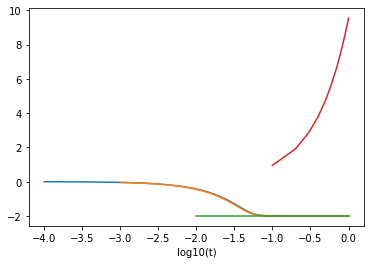

In [15]:
import numpy as np
import matplotlib.pyplot as plt


    
def eu(t, h, y):
    y+=(-100*y+1)*h
    return y    

tend=1.


for h in [1.e-4,1.e-3,1.e-2,1.e-1]:
    y=1.0
    t=0
    tp=[]
    y0p=[]

    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = eu(t,h,y)
        y0p=np.append(y0p,y)
        t = t+h
        tp=np.append(tp,t)

    plt.plot(np.log10(tp),np.log10(np.abs(y0p)))
    
plt.xlabel('log10(t)')
plt.show()

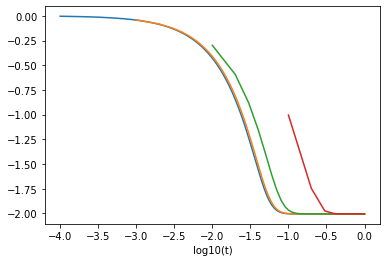

In [62]:
#Please use backward Euler method, y_{n+1}-y_{n}=-101*y_{n+1}*h

import numpy as np
import matplotlib.pyplot as plt




    
def eu(t, h, y):
    y=# please finish backward euler method
    return y    

tend=1.


for h in [1.e-4,1.e-3,1.e-2,1.e-1]:
    y=1.0
    t=0
    tp=[]
    y0p=[]

    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = eu(t,h,y)
        y0p=np.append(y0p,y)
        t = t+h
        tp=np.append(tp,t)

    plt.plot(np.log10(tp),np.log10(np.abs(y0p)))
    
plt.xlabel('log10(t)')
plt.show()

In [ ]:
# Homework

# Undergraduate student:
# A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method
# and plot height (z) vs time (t).


#Graduate student:
# Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. 